# Checking differences in chlorophyll with SeaWiFS

In [2]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
#import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

In [9]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        if clip is None:
            clip = self.clip

        result, is_scalar = self.process_value(value)

        self.autoscale_None(result)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        if not (vmin < midpoint < vmax):
            raise ValueError("midpoint must be between maxvalue and minvalue.")
        elif vmin == vmax:
            result.fill(0) # Or should it be all masked? Or 0.5?
        elif vmin > vmax:
            raise ValueError("maxvalue must be bigger than minvalue")
        else:
            vmin = float(vmin)
            vmax = float(vmax)
            if clip:
                mask = np.ma.getmask(result)
                result = np.ma.array(np.clip(result.filled(vmax), vmin, vmax),
                                  mask=mask)

            # ma division is very slow; we can take a shortcut
            resdat = result.data

            #First scale to -1 to 1 range, than to from 0 to 1.
            resdat -= midpoint
            resdat[resdat>0] /= abs(vmax - midpoint)
            resdat[resdat<0] /= abs(vmin - midpoint)

            resdat /= 2.
            resdat += 0.5
            result = np.ma.array(resdat, mask=result.mask, copy=False)

        if is_scalar:
            result = result[0]
        return result

# input file

In [8]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [5]:
PAR_inds = sorted(glob.glob('/glade/u/home/gabyn/scratch/SPECTRA/GNG595_2ndcycle_1990-2009_clim/regrid/regrid_GNG595_clim_1990-2009_PAR_avg.*.nc', recursive=True))
PAR_ds = xr.open_mfdataset(PAR_inds,combine='by_coords')

In [22]:
### First 20 year climatology GNG595
file = '/glade/u/home/gabyn/scratch/SPECTRA/GNG595_2ndcycle_1990-2009_clim'
newNCDFfiles1 = sorted(glob.glob(f'{file}/GNG595_clim_1990-2009_*.nc', recursive=True),
                      key=numericalSort)

ds_01 = xr.open_mfdataset(newNCDFfiles1,concat_dim='time', combine='nested')

In [24]:
chla_01 = np.nansum(np.stack([ds_01.ppChl, ds_01.mp1Chl, ds_01.diazChl, ds_01.diat1Chl, ds_01.mp2Chl, ds_01.diat2Chl, ds_01.mp3Chl, ds_01.diat3Chl, ds_01.mp4Chl]), axis =0)
chla_01[chla_01<=0]=np.nan

## Load remapped files

In [25]:
regrid_chl = '/glade/u/home/gabyn/scratch/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_'

diat1_01_inds = sorted(glob.glob(f'{regrid_chl}diat1Chl.*.nc', recursive=True))
diat1_01_ds = xr.open_mfdataset(diat1_01_inds,concat_dim='time', combine='nested')

diat2_01_inds = sorted(glob.glob(f'{regrid_chl}diat2Chl.*.nc', recursive=True))
diat2_01_ds = xr.open_mfdataset(diat2_01_inds,concat_dim='time', combine='nested')

diat3_01_inds = sorted(glob.glob(f'{regrid_chl}diat3Chl.*.nc', recursive=True))
diat3_01_ds = xr.open_mfdataset(diat3_01_inds,concat_dim='time', combine='nested')

mp1_01_inds = sorted(glob.glob(f'{regrid_chl}mp1Chl.*.nc', recursive=True))
mp1_01_ds = xr.open_mfdataset(mp1_01_inds,concat_dim='time', combine='nested')

mp2_01_inds = sorted(glob.glob(f'{regrid_chl}mp2Chl.*.nc', recursive=True))
mp2_01_ds = xr.open_mfdataset(mp2_01_inds,concat_dim='time', combine='nested')

mp3_01_inds = sorted(glob.glob(f'{regrid_chl}mp3Chl.*.nc', recursive=True))
mp3_01_ds = xr.open_mfdataset(mp3_01_inds,concat_dim='time', combine='nested')

mp4_01_inds = sorted(glob.glob(f'{regrid_chl}mp4Chl.*.nc', recursive=True))
mp4_01_ds = xr.open_mfdataset(mp4_01_inds,concat_dim='time', combine='nested')

pp_01_inds = sorted(glob.glob(f'{regrid_chl}ppChl.*.nc', recursive=True))
pp_01_ds = xr.open_mfdataset(pp_01_inds,concat_dim='time', combine='nested')

diaz_01_inds = sorted(glob.glob(f'{regrid_chl}diazChl.*.nc', recursive=True))
diaz_01_ds = xr.open_mfdataset(diaz_01_inds,concat_dim='time', combine='nested')

	NC4_close: ncid 0x10000
			nc4_close_hdf5_file: h5->path /glade/work/jluo/obs/SeaWiFS/climatology_regridded/01_S19980012010031.L3m_MC_CHL_chl_ocx_gx1v6.nc abort 0
			nc4_rec_grp_HDF5_del: grp->name /
			closing HDF5 dataset 360287970189639680
			closing HDF5 dataset 360287970189639681
			closing HDF5 dataset 360287970189639682
			closing HDF5 dataset 360287970189639683
			closing HDF5 dataset 360287970189639687
			closing HDF5 dataset 360287970189639690
			nc4_close_netcdf4_file: h5->path /glade/work/jluo/obs/SeaWiFS/climatology_regridded/01_S19980012010031.L3m_MC_CHL_chl_ocx_gx1v6.nc abort 0
			nc4_rec_grp_del: grp->name /
			att_free: name _FillValue 
			att_free: name units 
			att_free: name long_name 
			att_free: name comments 
			att_free: name _FillValue 
			att_free: name long_name 
			att_free: name units 
			att_free: name _FillValue 
			att_free: name long_name 
			att_free: name units 
	NC4_close: ncid 0x20000
			nc4_close_hdf5_file: h5->path /glade/work/jluo/obs/SeaWiFS/

In [26]:
phytoChl_01 = np.stack([pp_01_ds.ppChl, mp1_01_ds.mp1Chl, diaz_01_ds.diazChl, 
                               diat1_01_ds.diat1Chl, mp2_01_ds.mp2Chl, diat2_01_ds.diat2Chl, 
                               mp3_01_ds.mp3Chl, diat3_01_ds.diat3Chl, mp4_01_ds.mp4Chl])
phytoChl_01_surface = np.nansum(phytoChl_01[:,:,0,:,:], axis =0) 

In [27]:
obsfiles = sorted(glob.glob('/glade/work/jluo/obs/SeaWiFS/climatology_regridded/'+'*L3m_MC_CHL_chl_ocx_gx1v6.nc', recursive=True),
                      key=numericalSort)
obs = xr.open_mfdataset(obsfiles,combine='by_coords')

	NC4_open: path /glade/work/jluo/obs/SeaWiFS/climatology_regridded/01_S19980012010031.L3m_MC_CHL_chl_ocx_gx1v6.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/work/jluo/obs/SeaWiFS/climatology_regridded/01_S19980012010031.L3m_MC_CHL_chl_ocx_gx1v6.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset nlat
			found dataset nlon
			found dataset time
			found dataset chl_ocx
			found dataset TLONG
			found dataset TLAT
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0x130000 ext_ncid 0x130000
		FILE - path: /glade/work/jluo/obs/SeaWiFS/climatology_regridded/01_S19980012010031.L3m_MC_CHL_chl_ocx_gx1v6.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 6 natts: 0
		 DIMENSION - dimid: 0 name: nlat len: 384 unlimited: 0
		 DIMENSION - dimid: 1 name: nlon len: 320 unlimited: 0
		 DIMENSION - dimid: 2 name: time len: 1

In [28]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_dim: ncid 0x130000 dimid 2
		NC4_inq_dim: ncid 0x130000 dimid 0
		NC4_inq_dim: ncid 0x130000 dimid 1
		NC4_inq_dim: ncid 0x130000 dimid 2
		NC4_inq_dim: ncid 0x130000 dimid 0
		NC4_inq_dim: ncid 0x130000 dimid 1
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_dim: ncid 0x130000 dimid 2
		NC4_inq_dim: ncid 0x130000 dimid 0
		NC4_inq_dim: ncid 0x130000 dimid 1
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_dim: ncid 0x130000 dimid 2
		NC4_inq_dim: ncid 0x130000 dimid 0
		NC4_inq_dim: ncid 0x130000 dimid 1
		NC4_inq_var_all: ncid 0x130000 varid 3
			NC4_get_vars: var->hdr.name chl_ocx mem_nc_type 5
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_var_all: ncid 0x130000 varid 3
		NC4_inq_dim: ncid 0x130000 dimid 2
		NC4_inq_dim: ncid 0x130000 dimid 0
		NC4_inq_dim: ncid 0x130000 dimid 1
		NC4_inq_att: ncid 0x1

{60: ([<matplotlib.lines.Line2D at 0x2ae9304fef10>,
  []),
 90: ([<matplotlib.lines.Line2D at 0x2ae9304fee90>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x2ae93050ed90>], [])}

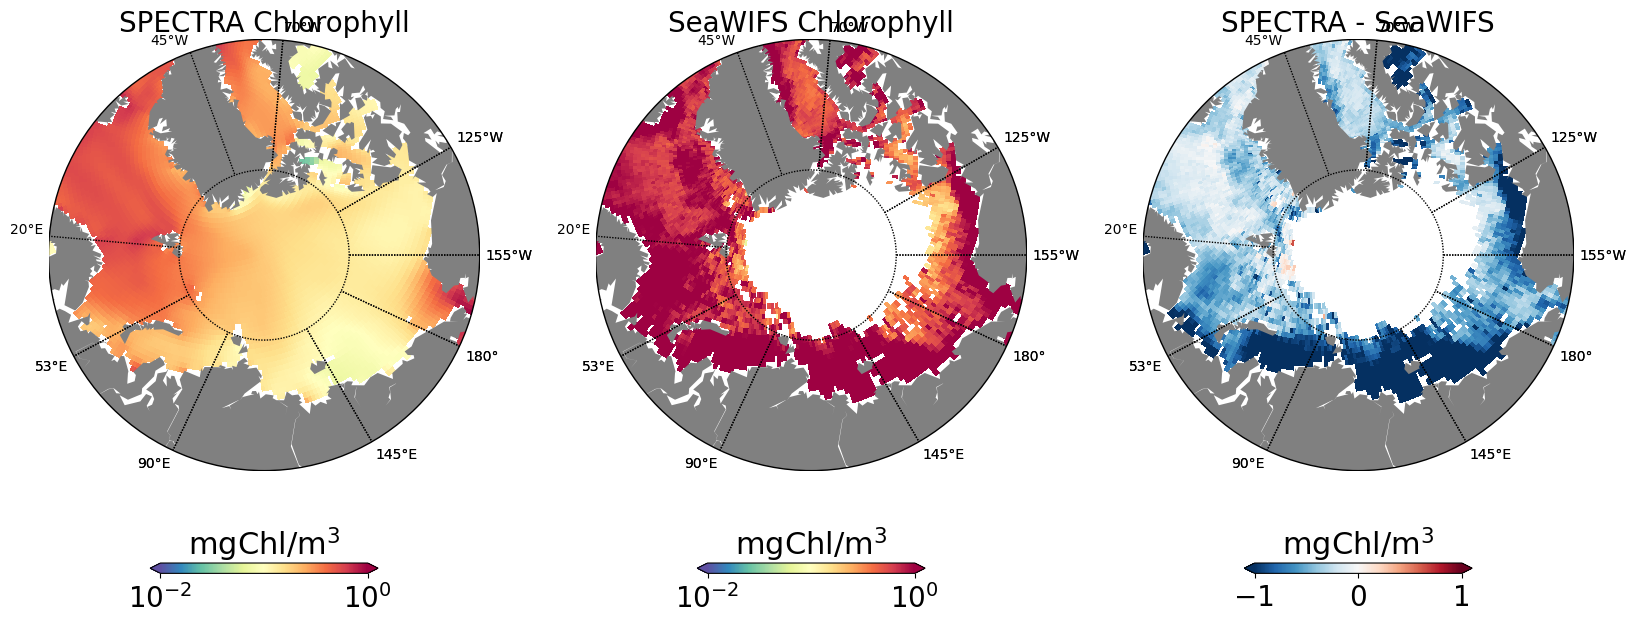

In [30]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
tlon, tlat, chl = adjust_pop_grid(ds_01.TLONG, ds_01.TLAT, np.nanmean(chla_01[:,0,:,:], axis=0))
x,y = m(tlon, tlat)
cf = m.pcolor(x,y,chl,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('SPECTRA Chlorophyll', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,290), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((290,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])

ax = fig.add_subplot(1, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
tlon, tlat, chlo = adjust_pop_grid(ds_01.TLONG, ds_01.TLAT, np.nanmean(obs.chl_ocx[:,:,:], axis=0))
x,y = m(tlon, tlat)
cf = m.pcolor(x,y,chlo,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('SeaWIFS Chlorophyll', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,290), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((290,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])

ax = fig.add_subplot(1, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,(np.log10(chl)-np.log10(chlo)),cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('SPECTRA - SeaWIFS', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,290), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((290,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
#fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/GNG595/Chla_AO_annual_comparison_1st20years.png',dpi=600, bbox_inches='tight')

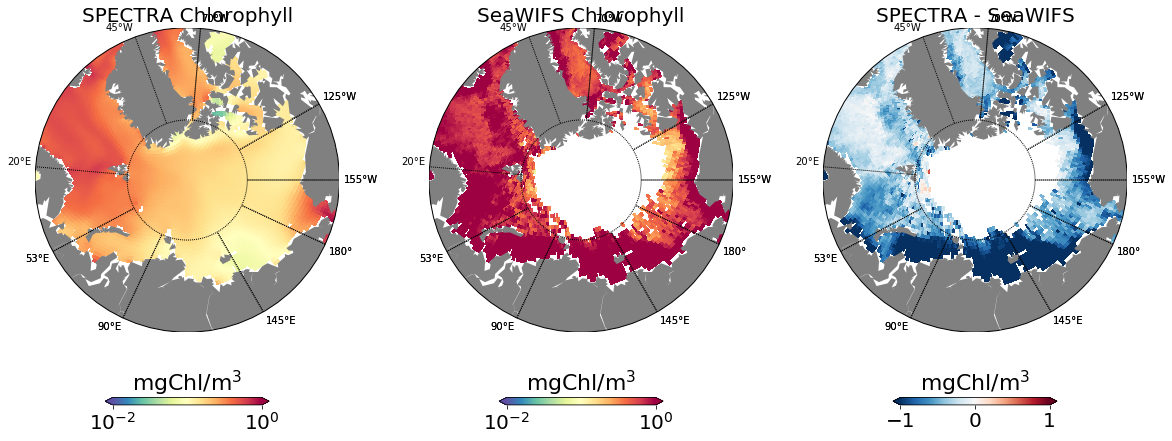

In [18]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
tlon, tlat, chl = adjust_pop_grid(ds_01.TLONG, ds_01.TLAT, np.nanmean(chla_02[:,0,:,:], axis=0))
x,y = m(tlon, tlat)
cf = m.pcolor(x,y,chl,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
#ax.set_title('SPECTRA Chlorophyll', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])

ax = fig.add_subplot(1, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
tlon, tlat, chlo = adjust_pop_grid(ds_01.TLONG, ds_01.TLAT, np.nanmean(obs.chl_ocx[:,:,:], axis=0))
x,y = m(tlon, tlat)
cf = m.pcolor(x,y,chlo,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
#ax.set_title('SeaWIFS Chlorophyll', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])

ax = fig.add_subplot(1, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,(np.log10(chl)-np.log10(chlo)),cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal',extend = 'both')
cb.ax.set_title('$mg Chl$/$m^3$', fontsize = 22)
cb.ax.tick_params(labelsize=20)
#ax.set_title('SPECTRA - SeaWIFS', fontsize =20)

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[0, 0, 0, 0])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/GNG595/Chla_AO_annual_comparison_2nd20years.png',dpi=600, bbox_inches='tight')

## Calculate Bias and RMSE

In [ ]:
#NO3
chl_predicted = np.nanmean(chla_02[:,0,:,:], axis=0) # annual average 
chl_observed  = np.nanmean(obs.chl_ocx,axis=0) # annual Average 
chl_rmse = (np.nanmean((chl_predicted-chl_observed)**2))**0.5

In [ ]:
print(f'bias= {chl_predicted-chl_observed}, RMSE = {chl_rmse} mgChl m^{-3}')